## Complex Networks HW 01
Sarah Elghazoly
March 22nd, 2021

# Homework:

1) select a network

2) Compute its degree distribution, cumulative degree distribution, 
$k_{min}$ and $\hat\gamma$, good of fitness with KS test, and p-value

### 1. Description of network:

This data set found at (https://icon.colorado.edu/#!/networks) is a network of bus routes in Kolkata from 2016 where the nodes are the individual bus stations and the edges are the connections between consecutive stops. 



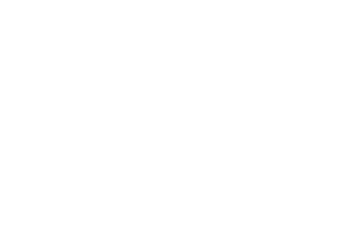

In [1]:
#First thing to do: import the libraries§
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats
import powerlaw
import networkx as nx
import time
import pandas as pd
import matplotlib.pyplot as plt
limits = plt.axis("off")

In [2]:
path_file = 'dbn.txt'
edge_list=pd.read_csv(path_file, delimiter = '\t' ,header=0,names=['source','target', 'weight'])
# edge_list=pd.read_csv(path_file, delimiter = '\t' ,header=None, names = ['source', 'target'])


In [3]:
#Initializate an empty Graph
G=nx.Graph()

In [4]:
#add nodes
#let us consider the first 10 raws of the edge_list
# nodes=[0,5, 6, 15, 72, 92, 162, 249, 258, 290, 292]
nodes = edge_list['source'].unique()[0:20].tolist()
G.add_nodes_from(nodes)

In [5]:
#add the edges
for _tuple in edge_list[:20].iterrows():
    #print(_tuple[1].source,_tuple[1].target)
    G.add_edge(_tuple[1].source,_tuple[1].target)

In [6]:
# get rid of weight column
edge_list=edge_list.iloc[:,0:2]
# edge_list=edge_list.iloc[0:50,0:2]
# create suitable file
edge_list.to_csv('dbn2.txt',sep =' ', header=False, index =False)

In [7]:
# Use built in function of Networks
start=time.time()
# G = nx.read_edgelist(path_file)
G = nx.read_edgelist('dbn2.txt')
print(time.time()-start)

0.01296544075012207


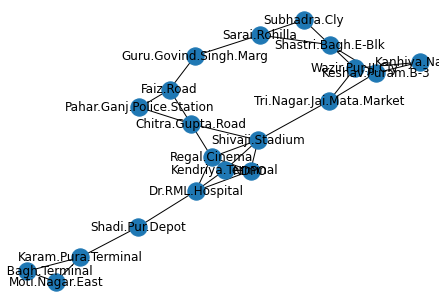

In [8]:
H=G.subgraph(nodes)
# nx.draw(G,with_labels=True)
nx.draw(H, with_labels = True)
plt.show()

### 2. Computing degree distribution:
a) compute its **degree sequence**

b) compute the **frequency** for each values of k in the degree sequence

c) **normalize** the frequency to the total count.

In [9]:
#here we look for the degree of each node.
#we use a dictionary
start=time.time()
degrees={}
for i in edge_list.iterrows():
    if i[1].source not in degrees:
        degrees[i[1].source]=0
    if i[1].target not in degrees:
        degrees[i[1].target]=0
    degrees[i[1].source]+=1
    degrees[i[1].target]+=1
print(time.time()-start)

0.32143378257751465


In [10]:
degree_sequence=list(degrees.values())

**degree sum formula**  (also sometimes called the handshaking lemma)

 $\sum_i k_i$=2|E|

In [11]:
#Using networkX
start=time.time()
degree_sequence_nx=[d for d in list(dict(G.degree()).values())]
print(time.time()-start)

0.001007080078125


Using an histogram we can compute the degree frequency

In [12]:
bins=np.arange(0.5, max(np.unique(degree_sequence_nx)),1)

In [13]:
c=1
for i,_ in enumerate(bins):
    if c <= 10:
        print(bins[i],'-->',bins[i+1])
        c+=1

0.5 --> 1.5
1.5 --> 2.5
2.5 --> 3.5
3.5 --> 4.5
4.5 --> 5.5
5.5 --> 6.5
6.5 --> 7.5
7.5 --> 8.5
8.5 --> 9.5
9.5 --> 10.5


In [14]:
counts, bins=np.histogram(degree_sequence_nx,bins=bins)
counts_nx, bins=np.histogram(degree_sequence_nx,bins=bins)
#we use the center of the bin as x for the frequency
x=(bins[1:]-bins[:-1])/2 +bins[:-1]

### Normalized counts

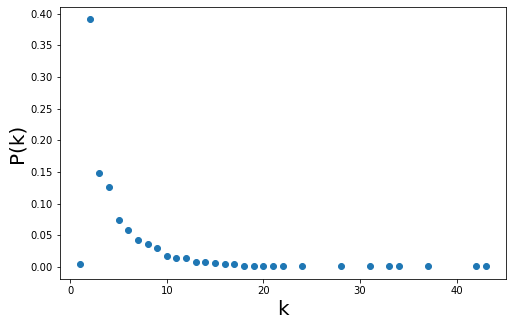

In [15]:
plt.figure(figsize=(8,5))
plt.plot(x[counts!=0],counts[counts!=0]/sum(counts[counts!=0]),'o')

plt.ylabel('P(k)', fontsize=20)
plt.xlabel('k',fontsize=20)

plt.show()

### Log-log plots to determine power of distribution

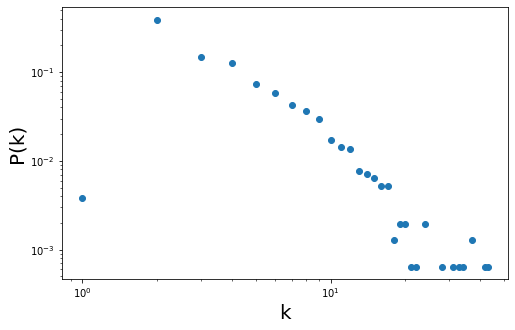

In [16]:
plt.figure(figsize=(8,5))
plt.loglog(x[counts!=0],counts[counts!=0]/sum(counts[counts!=0]),'o')
plt.ylabel('P(k)', fontsize=20)
plt.xlabel('k',fontsize=20)

plt.show()

### Normalized log log

In [17]:
xx,countss=np.unique(degree_sequence_nx,return_counts=True)

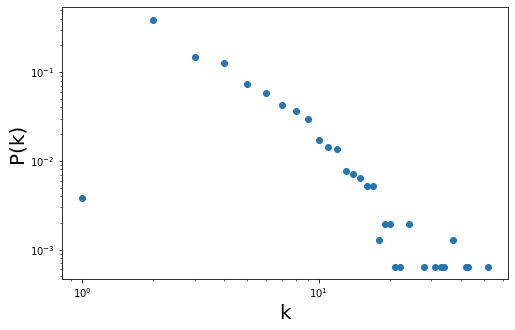

In [18]:
plt.figure(figsize=(8,5))
plt.loglog(xx,countss/sum(countss),'o')
plt.ylabel('P(k)', fontsize=20)
plt.xlabel('k',fontsize=20)

plt.show()

### Compute Power Law Fit

In [19]:
##cal the function: input the degree sequence

# Computes the power law fit: scaling exponent gamma, and KS statistic, k_min

fit = powerlaw.Fit(degree_sequence_nx, discrete=True)
alpha=fit.alpha
print('scaling exponent:',alpha)
k_min=fit.xmin
print('k_min:',k_min)
print('D:', fit.D)

scaling exponent: 3.4761862738010683
k_min: 8.0
D: 0.033162598712675684


Calculating best minimal value for power law fit
C:\ProgramData\Anaconda3\lib\site-packages\powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /
C:\ProgramData\Anaconda3\lib\site-packages\powerlaw.py:699: RuntimeWarning: divide by zero encountered in true_divide
  (CDF_diff**2) /


Using the power law fit from the package powerlaw to compare a power law fit to a log norm fit the scaling parameter $\widehat{\gamma}$ to be 3.48 and the minimum k that minimizes the Kolmogorov-Smirnov statistic to be 8. The KS statistic $\textbf{D}$ is computed to be 0.033.

### Goodness of fit
The p value for a comparison between fits for this model between a power law fit and an exponential fit is 0.3 which is greater than the range of accepted p values to suggest an accurate R value. The R value is less than 0 which suggests that the lognormal positive distribution is the preferred fit for this model.


In [20]:
fit = powerlaw.Fit(degree_sequence_nx, discrete=True)
R, p = fit.distribution_compare('power_law', 'lognormal_positive')
# R, p = fit.distribution_compare('power_law', 'truncated_power_law')

print('R', R)
print('p', p)

R -1.5925261726257407
p 0.3002778354190432


Calculating best minimal value for power law fit


Using the package $\textbf{power-law}$ from (https://github.com/jdelmolino/power-law) I attempted to compute the individual p value and goodness of fit value for the network. It uses the same reference as the package powerlaw to compute the p-value for the Kolmogorov-Smirnov test by computing D for a range of minimum k values and scale value in order to compute the p-value. The package produces a p-value of 1 for this network, indicating that either something is wrong with the package or that this fit fails to disprove the null hypothesis. ** Note: I had to update elements of the plpva code from older version of python, I am attaching the tinkered code in this folder.

In [22]:
from plpva import *

In [53]:
p, gof = plpva(degree_sequence_nx, k_min, vec=np.arange(1.002,10.001, .0002), reps=1000, quiet=True)
print('p',p)
print('goodness of fit:', gof)

p 1.0
goodness of fit: 0.03515169258168194
